IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET- https://www.kaggle.com/datasets/rajeshrampure/zomato-dataset

In [9]:
df=pd.read_csv(r"C:\Users\MUSKAN\zomato\zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [137]:
df.shape #gives (rows,column)

(51717, 17)

In [139]:
df.dtypes #gives data type of each column 

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [141]:
df.describe() 

,rate,votes
count,41665.000000,51717.000000
mean,3.700449,283.697527
std,0.440513,803.838853
min,1.800000,0.000000
25%,3.400000,7.000000
50%,3.700000,41.000000
75%,4.000000,198.000000
max,4.900000,16832.000000


In [145]:
df.isnull().sum()
df.duplicated().sum()

0

#DATA CLEANING AND PREPARATION

In [32]:
def removeDenominatorFromRate(val):
    val=str(val).split('/')
    val=val[0];
    return str(val)

df['rate']=df['rate'].apply(removeDenominatorFromRate)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [34]:
#SUMMARY OF DATAFRAME
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         51717 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Text(0.5, 0, 'Type of restaurant')

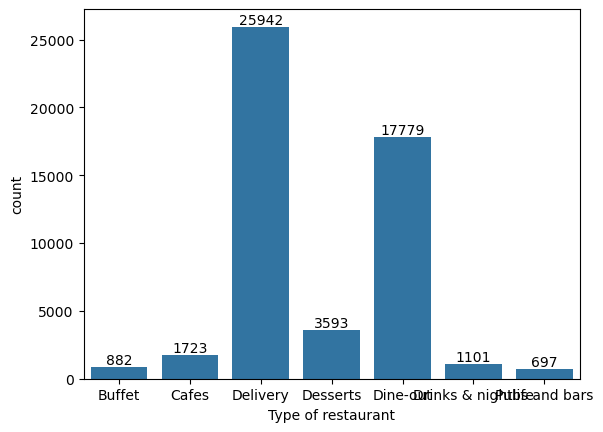

In [42]:
#Exploring types of restaurant
ax=sns.countplot(x=df['listed_in(type)'])
ax.bar_label(ax.containers[0])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

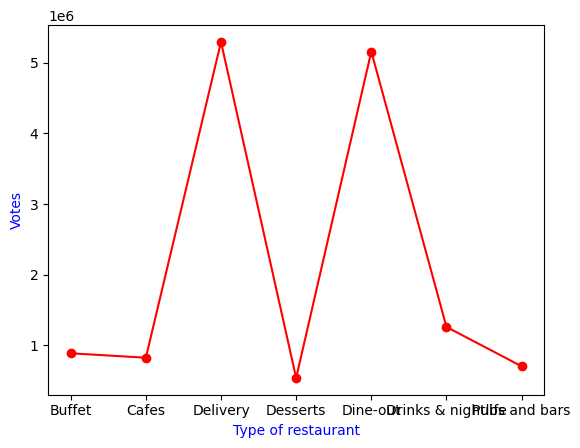

In [55]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='red', marker='o')
plt.xlabel('Type of restaurant', c='blue', size=10)
plt.ylabel('Votes', c='blue', size=10)

In [71]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
49170    Byg Brewski Brewing Company
49627    Byg Brewski Brewing Company
50059    Byg Brewski Brewing Company
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

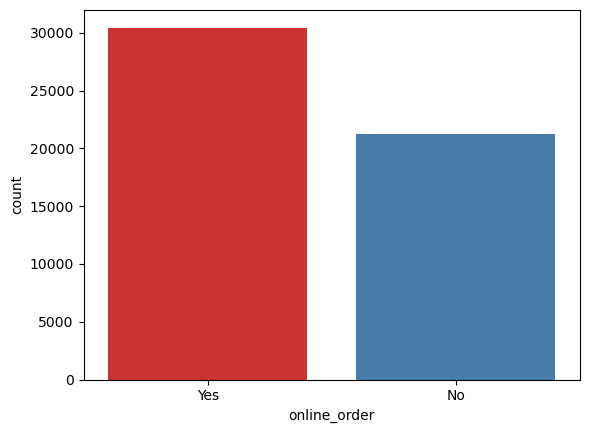

In [87]:
sns.countplot(x=df['online_order'],hue='online_order',data=df,palette='Set1',legend=False)

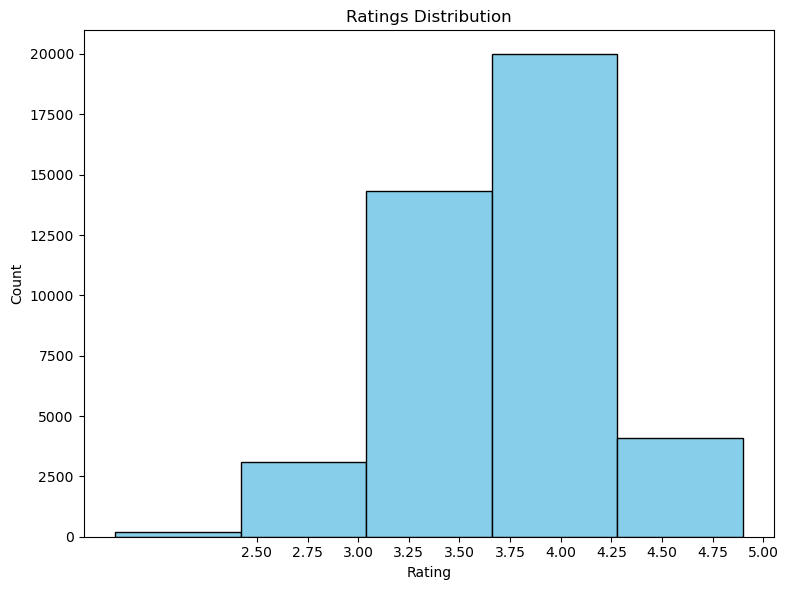

In [115]:
plt.figure(figsize=(8, 6))
plt.hist(df['rate'], bins=5, color='skyblue', edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(np.arange(2.5, 5.1, 0.25))  
plt.tight_layout()
plt.show()


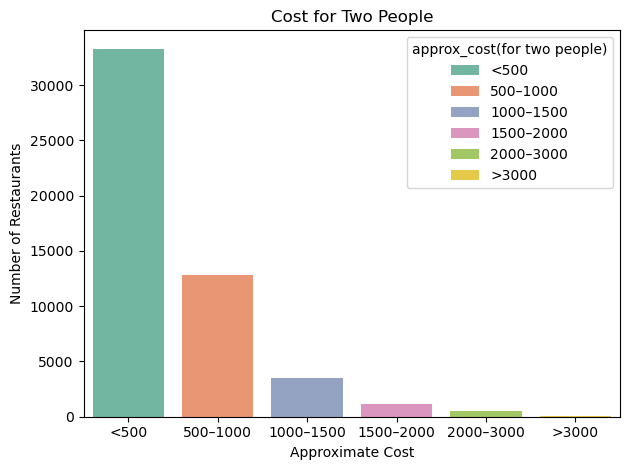

In [131]:
# Convert to string and remove commas 
cost_series = df['approx_cost(for two people)'].astype(str).str.replace(',', '', regex=False)

#Convert to numeric, invalid values become NaN
cost_series = pd.to_numeric(cost_series, errors='coerce')

#Bin the values
bins = [0, 500, 1000, 1500, 2000, 3000, 5000]
labels = ['<500', '500–1000', '1000–1500', '1500–2000', '2000–3000', '>3000']
binned_data = pd.cut(cost_series, bins=bins, labels=labels)

#Plot the clean countplot
sns.countplot(x=binned_data, hue=binned_data,palette='Set2')
plt.title("Cost for Two People")
plt.xlabel("Approximate Cost")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()


<Axes: xlabel='online_order', ylabel='rate'>

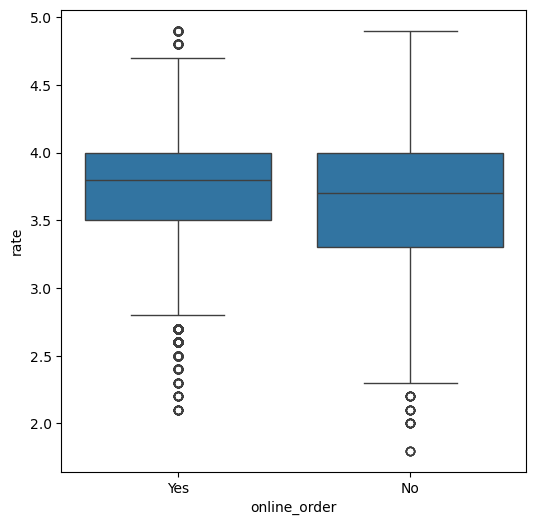

In [133]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

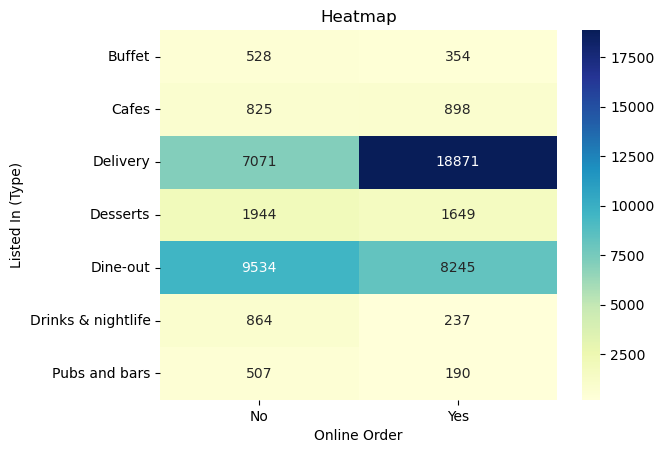

In [135]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

City wise analysis

In [151]:
df['listed_in(city)'].value_counts().head(10)

listed_in(city)
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Name: count, dtype: int64

In [149]:
df.groupby('listed_in(city)')['rate'].mean().sort_values(ascending=False)

listed_in(city)
Church Street            3.804262
MG Road                  3.802023
Brigade Road             3.801146
Residency Road           3.781222
Lavelle Road             3.776818
Koramangala 6th Block    3.763153
Koramangala 5th Block    3.760255
Koramangala 4th Block    3.759035
Koramangala 7th Block    3.758410
Indiranagar              3.745659
Old Airport Road         3.719040
Malleshwaram             3.715523
Frazer Town              3.714838
Basavanagudi             3.707276
BTM                      3.707241
Jayanagar                3.694969
Banashankari             3.666758
HSR                      3.660821
Rajajinagar              3.656948
Kalyan Nagar             3.647913
Kammanahalli             3.639265
New BEL Road             3.633741
JP Nagar                 3.629472
Whitefield               3.624712
Bellandur                3.624614
Sarjapur Road            3.594706
Brookefield              3.562348
Bannerghatta Road        3.555875
Marathahalli             3.55220

RESTAURANT TRENDS

In [161]:
#POPULAR RESTAURANTS
df.groupby('name')['votes'].sum().sort_values(ascending=False).head(10)

name
Onesta                         347520
Truffles                       301059
Empire Restaurant              229808
Hammered                       180602
The Black Pearl                172122
Meghana Foods                  129557
Barbeque Nation                108425
Smally's Resto Cafe            102877
Byg Brewski Brewing Company     99531
Gilly's Restobar                98808
Name: votes, dtype: int64

In [163]:
#COMMON CUISINES
df['cuisines'].value_counts().head(10)

cuisines
North Indian                           2913
North Indian, Chinese                  2385
South Indian                           1828
Biryani                                 918
Bakery, Desserts                        911
Fast Food                               803
Desserts                                766
Cafe                                    756
South Indian, North Indian, Chinese     726
Bakery                                  651
Name: count, dtype: int64